In [112]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# On vérifie que le fichier train.csv est bien chargé
# print(df_train) 
# print(df_test)

# Afficher les types de données des colonnes
print('Afficher les types de données des colonnes :')
print(df_train.dtypes)

print('---------------------------------------')

# Vérifier les valeurs manquantes dans le DataFrame et les additionner
print('Vérifier les valeurs manquantes additionnées dans le DataFrame :')
print(df_train.isna().sum())

print('---------------------------------------')



Afficher les types de données des colonnes :
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
---------------------------------------
Vérifier les valeurs manquantes additionnées dans le DataFrame :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------------------------------------


In [113]:
# Afficher les statistiques descriptives du DataFrame
print('Statistiques descriptives du DataFrame :')
print(df_train.describe())


Statistiques descriptives du DataFrame :
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [114]:
# Afficher les informations du DataFrame
print('Informations sur le DataFrame :')
df_train.info()

print('---------------------------------------')

# Afficher les 5 premières lignes du DataFrame
print('Les 5 premières lignes du DataFrame :')
df_train.head(5)

Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
---------------------------------------
Les 5 premières lignes du DataFrame :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
# Filtrer les passagers qui n'ont pas survécu
df_train_filtered = df_train.query('Survived == False')

print(df_train_filtered)

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
6              7         0       1                   McCarthy, Mr. Timothy J   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch        

In [116]:
# Répartition des passagers par tranches d'âges
fig_reparti_age_passager = px.histogram(df_train, x='Age', nbins=30, title='Répartition des passagers par tranches d\'âge')
fig_reparti_age_passager.update_layout(xaxis_title='Âge', yaxis_title='Nombre de passagers')
fig_reparti_age_passager.show() 

In [117]:
# Compter le nombre d'hommes et de femmes sur le Titanic

# Créer une nouvelle colonne avec des labels explicites
df_train['Sex_label'] = df_train['Sex'].map({'male': 'Homme', 'female': 'Femme'})

# Afficher la répartition des passagers par sexe
fig = px.histogram(
    df_train,
    x='Sex_label',
    color='Sex_label',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    labels={'Sex_label': 'Sexe'},
    title="Répartition des passagers par sexe",
)

# Ajouter le nombre de passagers par sexe
fig.update_layout(
    xaxis_title="Sexe",
    yaxis_title="Nombre de passagers",
    bargap=0.2,
    height=600
)

# Afficher le graphique
fig.show()

In [118]:
# Compter le nombre de survivants et de décès selon le sexe

# Créer une nouvelle colonne avec des labels explicites
df_train['Survived_label'] = df_train['Survived'].map({0: 'Mort', 1: 'Survécu'})

# Créer le graphique de la répartition des survivants et des décès selon le sexe
fig_survie_sexe = px.histogram( 
    df_train,
    x='Sex_label',
    color='Survived_label',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="Nombre de survivants et de décès selon le sexe",
    labels={'Survived_label': 'Statut de survie'},
    category_orders={
        'Sex_label': ['Homme', 'Femme'],
        'Survived_label': ['Survécu', 'Mort']
    }
)

# Update le graphique avec les titres des axes et la hauteur
fig_survie_sexe.update_layout(
    xaxis_title="Sexe",
    yaxis_title="Nombre de passagers",
    bargap=0.2,
    height=600
)

# Afficher le graphique
fig_survie_sexe.show()

In [129]:
# Répartition de la survie selon le sexe (graphique circulaire et pourcentages)

# Données hommes et femmes
df_hommes = df_train[df_train['Sex'] == 'male']
df_femmes = df_train[df_train['Sex'] == 'female']

# Compter les occurrences
hommes_counts = df_hommes['Survived_label'].value_counts().reindex(['Survécu', 'Mort'], fill_value=0)
femmes_counts = df_femmes['Survived_label'].value_counts().reindex(['Survécu', 'Mort'], fill_value=0)

# Créer le graphique circulaire pour la répartition de la survie selon le sexe
fig_camembert = make_subplots(        # Création de la figure avec deux domaines pour les camenberts
    rows=1, cols=2,
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=["Hommes", "Femmes"]
)

# ✅ Définir les couleurs dans l’ordre des labels : ['Survécu', 'Mort']
colors_inverses = ['blue', 'red']  # Survécu = rouge, Mort = bleu

# Ajout du graphique pour les hommes
fig_camembert.add_trace(go.Pie(
    labels=hommes_counts.index,
    values=hommes_counts.values,
    name="Hommes",
    marker=dict(colors=colors_inverses),
    textinfo='percent+label'
), row=1, col=1)

# Ajout du graphique pour les femmes
fig_camembert.add_trace(go.Pie(
    labels=femmes_counts.index,
    values=femmes_counts.values,
    name="Femmes",
    marker=dict(colors=colors_inverses),
    textinfo='percent+label'
), row=1, col=2)

# Mise en page finale
fig_camembert.update_layout(
    title_text="Répartition de la survie selon le sexe",
    title_x=0.5,
    height=500
)

fig_camembert.show()

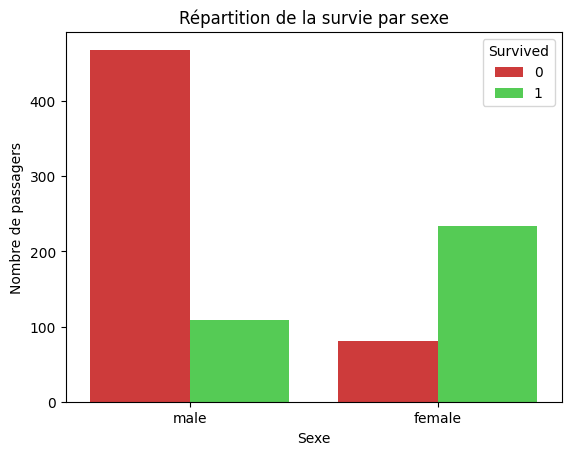

In [130]:
# Répartition de la survie des passagers par sexe (graphique à barres)
# Tester graphique à barres seaborn
sns.countplot(data=df_train, x="Sex", hue="Survived", palette={0: "#e52323", 1: "#41df41"})
plt.title("Répartition de la survie par sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre de passagers")
plt.show()

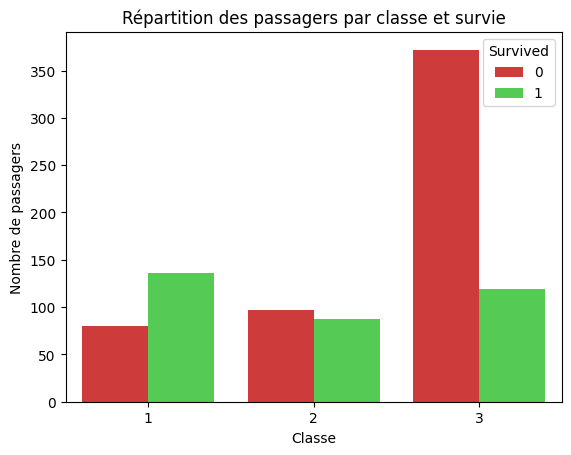

In [131]:
# Répartition des passagers par classe et survie (graphique à barres)
sns.countplot(data=df_train, x="Pclass", hue="Survived", palette={0: "#e52323", 1: "#41df41"})
plt.title("Répartition des passagers par classe et survie")
plt.xlabel("Classe")
plt.ylabel("Nombre de passagers")
plt.show()

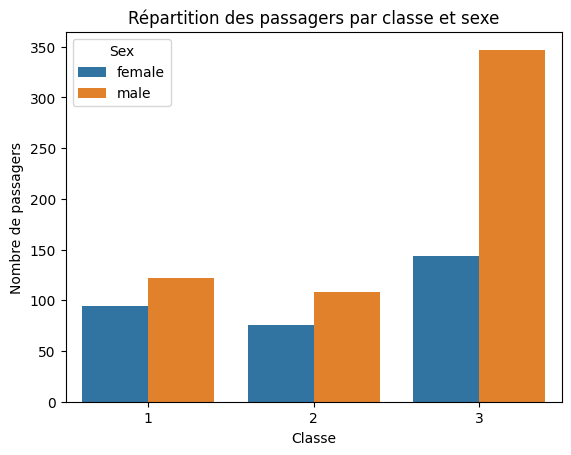

In [ ]:
# Répartition des passagers par classe et par sexe
sns.countplot(data=df_train, x="Pclass", hue="Sex")
plt.title("Répartition des passagers par classe et sexe")
plt.xlabel("Classe")
plt.ylabel("Nombre de passagers")
plt.show()

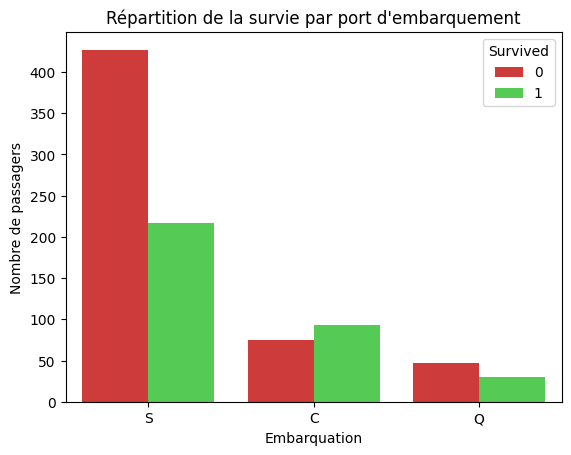

In [132]:
# Répartition de la survie des passagers selon le port d'embarquement
sns.countplot(data=df_train, x="Embarked", hue="Survived", palette={0: "#e52323", 1: "#41df41"})
plt.title("Répartition de la survie par port d'embarquement")
plt.xlabel("Embarquation")
plt.ylabel("Nombre de passagers")
plt.show()

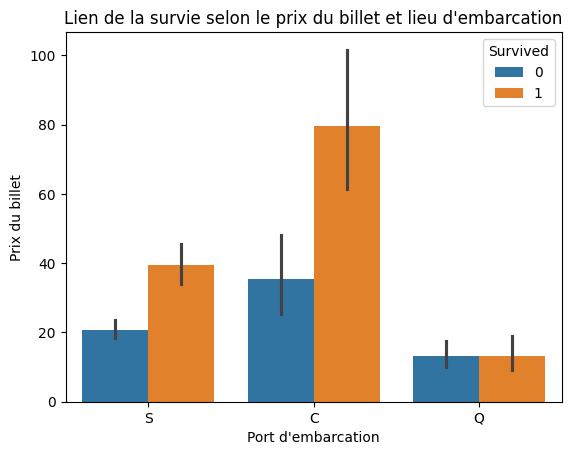

In [ ]:
# Lien entre le prix du ticket et le lieux d'embarquement
sns.barplot(data=df_train, x='Embarked', y='Fare', hue='Survived')
plt.title("Lien de la survie selon le prix du billet et lieu d'embarquement")
plt.xlabel("Port d'embarcation")
plt.ylabel('Prix du billet')
plt.show()

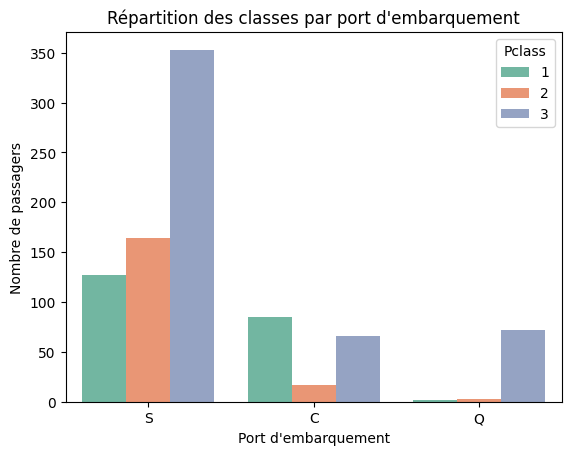

In [126]:
# Voir la relation entre la classe et le lieu d'embarcation.
sns.countplot(data=df_train,x="Embarked",hue="Pclass", dodge=True,palette="Set2")
plt.title("Répartition des classes par port d'embarquement")
plt.xlabel("Port d'embarquement")
plt.ylabel("Nombre de passagers")
plt.show()

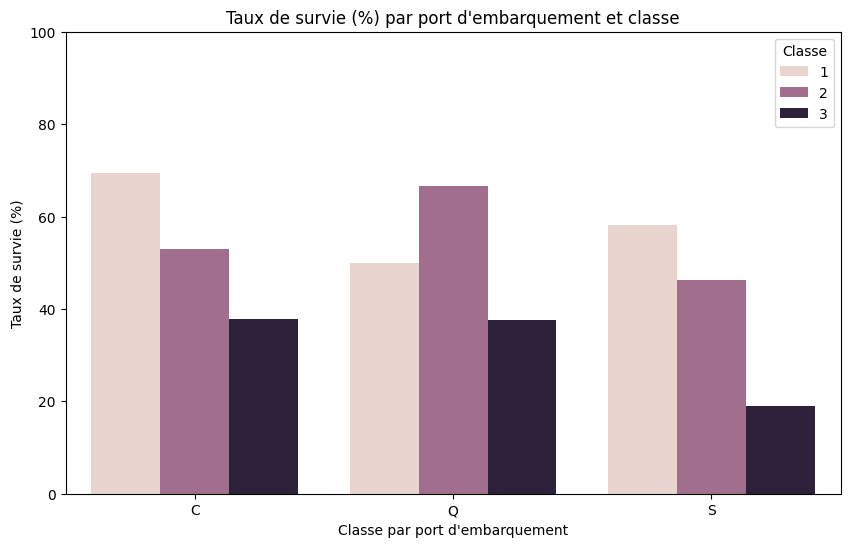

In [127]:
grouped = df_train.groupby(['Embarked', 'Pclass'])['Survived'].mean().reset_index()

grouped['Survived'] *= 100  # Convertir en %

plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='Embarked', y='Survived', hue='Pclass')
plt.title('Taux de survie (%) par port d\'embarquement et classe')
plt.ylabel('Taux de survie (%)')
plt.xlabel('Classe par port d\'embarquement')
plt.ylim(0, 100)
plt.legend(title='Classe')
plt.show()